In [1]:
import copy
import importlib
import os
import pathlib
from typing import Any, Mapping, Sequence

In [2]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import ray
import scipy
import seaborn as sns
import tensorflow as tf
from daaf import estimator_metrics
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats import proportion

2024-06-11 14:56:17,044	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-11 14:56:18.561672: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-11 14:56:18.667229: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-11 14:56:18.669321: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-11 14:56:21.016891: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from utils import dataproc

In [4]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/controljob/agg/1710783127/1711123071/metrics/*.parquet")

In [5]:
df_metrics = dataproc.read_data(files)

2024-06-11 14:56:22,777	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
/home/guilherme/.pyenv/versions/3.9.16/envs/rl_daaf_py39/lib/python3.9/site-packages/ray/data/datasource/parquet_datasource.py:242: FutureWarning: Passing 'use_legacy_dataset' is deprecated as of pyarrow 15.0.0 and will be removed in a future version.
  pq_ds = pq.ParquetDataset(


[dataset]: Run `pip install tqdm` to enable progress reporting.


2024-06-11 14:56:27,036	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8266 
/home/guilherme/.pyenv/versions/3.9.16/envs/rl_daaf_py39/lib/python3.9/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
  return transform_pyarrow.concat(tables)


In [6]:
df_metrics

,episode,exp_id,meta,returns,metrics,method
0,630,1710783127-1d9505bc-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-25.917591125198097, -25.242472266244057, -27...","{'returns': {'mean': -26.38985736925515, 'std'...",PP/DMR
1,630,1710783127-1d89640b-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-36.30110935023772, -36.318541996830426, -36....","{'returns': {'mean': -35.62290015847861, 'std'...",PP/IMR
5,630,1710783127-1d123c51-ABCSeq,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-12.210776545166402, -11.774960380348652, -10...","{'returns': {'mean': -10.796988906497624, 'std...",PP/LEAST
6,630,1710783127-1dd1542e-FrozenLake-v1,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...","[0.49920760697305866, 0.6767036450079239, 0.00...","{'returns': {'mean': 0.19960380348652937, 'std...",PP/DMR
8,630,1710783127-4790aecf-IceWorld,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...","[-37.6973058637084, -35.51188589540412, -36.48...","{'returns': {'mean': -36.20324881141046, 'std'...",PP/DMR
...,...,...,...,...,...,...
315994,1470,1710783127-fd2d7ab4-GridWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-109.32222977566282, -112.83344663494222, -11...","{'returns': {'mean': -110.37525492862001, 'std...",PP/LEAST
315995,1470,1710783127-fe6a0699-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-14.731475186947655, -15.038069340584636, -15...","{'returns': {'mean': -15.277090414683892, 'std...",PP/IMR
315996,1470,1710783127-fe6094fc-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-126.26444595513256, -124.39836845683209, -12...","{'returns': {'mean': -125.84687287559481, 'std...",PP/IMR
315997,1470,1710783127-fec7d9c9-RedGreenSeq,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-10.719918422841605, -9.496261046906866, -9.8...","{'returns': {'mean': -9.940516655336506, 'std'...",PP/LEAST


In [7]:
df_metrics.iloc[0]["meta"]

{'algorithm': 'q-learning',
 'algorithm_args': '{}',
 'discount_factor': 1.0,
 'drop_truncated_feedback_episodes': False,
 'dyna_prog_state_values': array([-38.24046866, -36.59401423, -36.54157405, -35.77078702,
        -35.88692312,   0.        , -33.25992091,   0.        ,
        -34.42030072, -32.37397904, -30.49810961,   0.        ,
          0.        , -29.57750584, -21.35853848,   0.        ]),
 'env': {'args': '{"map_name": "4x4"}',
  'level': '4x4',
  'name': 'IceWorld',
  '_level': '4KE3ASUFQGGUPERSDDRQAZAMA46CI2CMCJHGWJ7MRNI64JMEBETNDXFFPYWTQJF46S5BJ4NXXCHNMJSLII3ROYXI76DFOC3VAABGNVA='},
 'epsilon': 0.2,
 'exp_id': '1710783127-1d9505bc-IceWorld',
 'learning_rate': 0.1,
 'policy_type': 'PP',
 'reward_period': 4,
 'run_id': 12,
 'traj_mapping_method': 'DMR'}

In [8]:
envs = dataproc.get_distinct_envs(df_metrics)

In [9]:
envs

{('IceWorld', '4x4'): '{"map_name": "4x4"}',
 ('ABCSeq', 'n=7'): '{"length": 7, "distance_penalty": false}',
 ('FrozenLake-v1', '4x4'): '{"is_slippery": false, "map_name": "4x4"}',
 ('ABCSeq', 'n=10'): '{"length": 10, "distance_penalty": false}',
 ('TowerOfHanoi', 'disks=4'): '{"num_disks": 4}',
 ('RedGreenSeq',
  'n=9'): '{"cure": ["red", "green", "wait", "green", "red", "red", "green", "wait"]}',
 ('IceWorld', '8x8'): '{"map_name": "8x8"}',
 ('GridWorld',
  '4x12'): '{"grid": "oooooooooooo\\noooooooooooo\\noooooooooooo\\nsxxxxxxxxxxg"}'}

## Comparison: 3-Sigma Test

In [10]:
PVALUE_THRESHOLD = 0.05

In [11]:
def sample_iswithin_sigma_check(
    df_data, episode: int, sigmas=[3]
):
    df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    for key in ("algorithm", "algorithm_args", "reward_period", "discount_factor"):
        df_result[key] = df_result["meta"].apply(lambda meta: meta[key])    
    for key in ("level", "name"):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["env"][key])

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    df_result["env"] =  df_result["name"] + "/" + df_result["level"]
    # drop frozen-lake
    df_result = df_result[df_result["env"].apply(lambda name: "Frozen" not in name)]    
    del df_result["meta"]    
    del df_result["name"]
    del df_result["level"]
    del df_result["exp_id"]
    
    def is_within_sigma(y_pred, y_true, sigma):
        mean = np.mean(y_true)
        std = np.std(y_true)
        lb = mean - (sigma * std)
        ub = mean + (sigma * std)
        pred_mean = np.mean(y_pred)
        return 1 if lb <= pred_mean <= ub else 0

    def ztest(left_pos, left_neg, right_pos, right_neg):
        zstat, pvalue = proportion.proportions_ztest(
            count=left_pos, nobs=left_pos + left_neg, 
            value=right_pos / (right_pos + right_neg)
        )                
        if pvalue < PVALUE_THRESHOLD:
            outcome = "Reject H0 (Different)"
        else:
            outcome = "Fail to reject H0 (Similar)"
        return outcome            
    
    algo_types = {
        "one-step": set(["sarsa", "q-learning"]),
        "n-step": set(["nstep-sarsa"]),
    }
    dfs = {}
    df_conf = {}    
    for algo_type, algorithms in algo_types.items():
        df_algo = df_result[df_result["algorithm"].apply(lambda met: met in algorithms)]
        methods = sorted(df_algo["method"].unique())
        rows = []
        keys = ["env", "algorithm", "algorithm_args", "discount_factor", "reward_period"]
        df_baseline = df_algo[df_algo["reward_period"] == 1]
        baselines = {}
        for row in df_baseline.to_dict("records"):
            key = tuple(row[key] for key in keys[:-1])
            baselines[key] = row["returns"]

        df_rp = df_algo[df_algo["reward_period"] != 1]
        rows = []
        for row in df_rp.to_dict("records"):
            key = tuple([row[key] for key in keys[:-1]])
            full_reward_mean_return = baselines[key]
            for sigma in sigmas:
                new_row = copy.deepcopy(row)
                test_result = is_within_sigma(
                    y_pred=new_row["returns"], y_true=full_reward_mean_return,
                    sigma=sigma
                )
                new_row["sigma"] = sigma
                new_row["within_sigma"] = test_result
                rows.append(new_row)
        df_test_result = pd.DataFrame(rows)
        # aggreate over algorithm args and reward periods
        agg_keys = ["env", "method", "sigma", "within_sigma"]
        df_test_result = df_test_result[agg_keys].value_counts(
        ).reset_index().sort_values(["env", "method", "sigma", "within_sigma"]) 
        dfs[algo_type] = df_test_result
        
        # run tests
        method_rows = df_test_result.pivot(
                index=["env", "method", "sigma"], columns="within_sigma", values="count"
            ).reset_index().to_dict("records")
        df_test_result = pd.DataFrame(method_rows)
        rows = []
        for left in method_rows:
            for right in method_rows:
                outcome = ztest(
                    left_pos=left[1], left_neg = left[0],
                    right_pos=right[1], right_neg = right[0],
                )
                row = {
                    "left": left["method"],
                    "right": right["method"],
                    "outout": outcome,
                }
                rows.append(row)
        df_conf[algo_type] = dataproc.drop_duplicate_sets(
            pd.DataFrame(rows), keys=["left", "right"]
        )
    return dfs, df_conf


**K=100**

In [12]:
df_within_sigma_count_k100, df_within_sigma_stattest_k100 = sample_iswithin_sigma_check(df_metrics, episode=100)

In [13]:
df_within_sigma_count_k100["one-step"]

,env,method,sigma,within_sigma,count
26,ABCSeq/n=10,OP/OT,3,0,12
2,ABCSeq/n=10,PP/DMR,3,0,20
9,ABCSeq/n=10,PP/IMR,3,0,20
12,ABCSeq/n=10,PP/LEAST,3,0,18
37,ABCSeq/n=10,PP/LEAST,3,1,2
20,ABCSeq/n=7,OP/OT,3,0,12
1,ABCSeq/n=7,PP/DMR,3,0,20
5,ABCSeq/n=7,PP/IMR,3,0,20
6,ABCSeq/n=7,PP/LEAST,3,0,20
22,GridWorld/4x12,OP/OT,3,0,12


In [14]:
df_within_sigma_count_k100["n-step"]

,env,method,sigma,within_sigma,count
0,ABCSeq/n=10,PP/IMR,3,1,8
7,ABCSeq/n=10,PP/LEAST,3,1,8
17,ABCSeq/n=10,PP/nTD-SU,3,0,8
16,ABCSeq/n=7,PP/IMR,3,1,8
15,ABCSeq/n=7,PP/LEAST,3,1,8
14,ABCSeq/n=7,PP/nTD-SU,3,0,8
13,GridWorld/4x12,PP/IMR,3,1,8
12,GridWorld/4x12,PP/LEAST,3,1,8
11,GridWorld/4x12,PP/nTD-SU,3,0,8
10,IceWorld/4x4,PP/IMR,3,1,8


In [15]:
df_within_sigma_stattest_k100["one-step"]

,left,right,outout
0,OP/OT,OP/OT,Fail to reject H0 (Similar)
1,OP/OT,PP/DMR,Fail to reject H0 (Similar)
2,OP/OT,PP/IMR,Fail to reject H0 (Similar)
3,OP/OT,PP/LEAST,Fail to reject H0 (Similar)
29,PP/DMR,PP/DMR,Fail to reject H0 (Similar)
30,PP/DMR,PP/IMR,Fail to reject H0 (Similar)
31,PP/DMR,PP/LEAST,Fail to reject H0 (Similar)
58,PP/IMR,PP/IMR,Fail to reject H0 (Similar)
59,PP/IMR,PP/LEAST,Fail to reject H0 (Similar)
87,PP/LEAST,PP/LEAST,Fail to reject H0 (Similar)


In [16]:
df_within_sigma_stattest_k100["n-step"]

,left,right,outout
0,PP/IMR,PP/IMR,Fail to reject H0 (Similar)
1,PP/IMR,PP/LEAST,Fail to reject H0 (Similar)
2,PP/IMR,PP/nTD-SU,Fail to reject H0 (Similar)
22,PP/LEAST,PP/LEAST,Fail to reject H0 (Similar)
23,PP/LEAST,PP/nTD-SU,Fail to reject H0 (Similar)
44,PP/nTD-SU,PP/nTD-SU,Fail to reject H0 (Similar)


**K=500**

In [17]:
df_within_sigma_count_k500, df_within_sigma_stattest_k500 = sample_iswithin_sigma_check(df_metrics, episode=500)

In [18]:
df_within_sigma_count_k500["one-step"]

,env,method,sigma,within_sigma,count
18,ABCSeq/n=10,OP/OT,3,0,12
11,ABCSeq/n=10,PP/DMR,3,0,20
10,ABCSeq/n=10,PP/IMR,3,0,20
9,ABCSeq/n=10,PP/LEAST,3,0,20
21,ABCSeq/n=7,OP/OT,3,0,12
7,ABCSeq/n=7,PP/DMR,3,0,20
1,ABCSeq/n=7,PP/IMR,3,0,20
5,ABCSeq/n=7,PP/LEAST,3,0,20
20,GridWorld/4x12,OP/OT,3,0,12
6,GridWorld/4x12,PP/DMR,3,0,20


In [19]:
df_within_sigma_count_k500["n-step"]

,env,method,sigma,within_sigma,count
0,ABCSeq/n=10,PP/IMR,3,1,8
7,ABCSeq/n=10,PP/LEAST,3,1,8
9,ABCSeq/n=10,PP/nTD-SU,3,0,8
10,ABCSeq/n=7,PP/IMR,3,1,8
11,ABCSeq/n=7,PP/LEAST,3,1,8
12,ABCSeq/n=7,PP/nTD-SU,3,0,8
13,GridWorld/4x12,PP/IMR,3,1,8
21,GridWorld/4x12,PP/LEAST,3,0,3
20,GridWorld/4x12,PP/LEAST,3,1,5
1,GridWorld/4x12,PP/nTD-SU,3,0,8


In [20]:
df_within_sigma_stattest_k500["one-step"]

,left,right,outout
0,OP/OT,OP/OT,Fail to reject H0 (Similar)
1,OP/OT,PP/DMR,Fail to reject H0 (Similar)
2,OP/OT,PP/IMR,Fail to reject H0 (Similar)
3,OP/OT,PP/LEAST,Fail to reject H0 (Similar)
29,PP/DMR,PP/DMR,Fail to reject H0 (Similar)
30,PP/DMR,PP/IMR,Fail to reject H0 (Similar)
31,PP/DMR,PP/LEAST,Fail to reject H0 (Similar)
58,PP/IMR,PP/IMR,Fail to reject H0 (Similar)
59,PP/IMR,PP/LEAST,Fail to reject H0 (Similar)
87,PP/LEAST,PP/LEAST,Fail to reject H0 (Similar)


In [21]:
df_within_sigma_stattest_k500["n-step"]

,left,right,outout
0,PP/IMR,PP/IMR,Fail to reject H0 (Similar)
1,PP/IMR,PP/LEAST,Fail to reject H0 (Similar)
2,PP/IMR,PP/nTD-SU,Fail to reject H0 (Similar)
22,PP/LEAST,PP/LEAST,Fail to reject H0 (Similar)
23,PP/LEAST,PP/nTD-SU,Fail to reject H0 (Similar)
44,PP/nTD-SU,PP/nTD-SU,Fail to reject H0 (Similar)


**K = Max(K)**

In [22]:
df_within_sigma_count_kmax, df_within_sigma_stattest_kmax = sample_iswithin_sigma_check(df_metrics, episode=df_metrics["episode"].max())

In [23]:
df_within_sigma_count_kmax["one-step"]

,env,method,sigma,within_sigma,count
22,ABCSeq/n=10,OP/OT,3,0,12
5,ABCSeq/n=10,PP/DMR,3,0,20
0,ABCSeq/n=10,PP/IMR,3,0,20
1,ABCSeq/n=10,PP/LEAST,3,0,20
23,ABCSeq/n=7,OP/OT,3,0,12
2,ABCSeq/n=7,PP/DMR,3,0,20
10,ABCSeq/n=7,PP/IMR,3,0,19
39,ABCSeq/n=7,PP/IMR,3,1,1
12,ABCSeq/n=7,PP/LEAST,3,0,18
35,ABCSeq/n=7,PP/LEAST,3,1,2


In [24]:
df_within_sigma_count_kmax["n-step"]

,env,method,sigma,within_sigma,count
0,ABCSeq/n=10,PP/IMR,3,1,8
1,ABCSeq/n=10,PP/LEAST,3,1,8
8,ABCSeq/n=10,PP/nTD-SU,3,0,8
29,ABCSeq/n=7,PP/IMR,3,0,1
13,ABCSeq/n=7,PP/IMR,3,1,7
9,ABCSeq/n=7,PP/LEAST,3,1,8
11,ABCSeq/n=7,PP/nTD-SU,3,0,8
10,GridWorld/4x12,PP/IMR,3,1,8
23,GridWorld/4x12,PP/LEAST,3,0,3
18,GridWorld/4x12,PP/LEAST,3,1,5


In [25]:
df_within_sigma_stattest_kmax["one-step"]

,left,right,outout
0,OP/OT,OP/OT,Fail to reject H0 (Similar)
1,OP/OT,PP/DMR,Fail to reject H0 (Similar)
2,OP/OT,PP/IMR,Fail to reject H0 (Similar)
3,OP/OT,PP/LEAST,Fail to reject H0 (Similar)
29,PP/DMR,PP/DMR,Fail to reject H0 (Similar)
30,PP/DMR,PP/IMR,Fail to reject H0 (Similar)
31,PP/DMR,PP/LEAST,Fail to reject H0 (Similar)
58,PP/IMR,PP/IMR,Fail to reject H0 (Similar)
59,PP/IMR,PP/LEAST,Fail to reject H0 (Similar)
87,PP/LEAST,PP/LEAST,Fail to reject H0 (Similar)


In [26]:
df_within_sigma_stattest_kmax["n-step"]

,left,right,outout
0,PP/IMR,PP/IMR,Fail to reject H0 (Similar)
1,PP/IMR,PP/LEAST,Fail to reject H0 (Similar)
2,PP/IMR,PP/nTD-SU,Fail to reject H0 (Similar)
22,PP/LEAST,PP/LEAST,Fail to reject H0 (Similar)
23,PP/LEAST,PP/nTD-SU,Fail to reject H0 (Similar)
44,PP/nTD-SU,PP/nTD-SU,Fail to reject H0 (Similar)


## Plot Sigma Counts

In [27]:
df_within_sigma_count_kmax

{'one-step':                      env    method  sigma  within_sigma  count
 22           ABCSeq/n=10     OP/OT      3             0     12
 5            ABCSeq/n=10    PP/DMR      3             0     20
 0            ABCSeq/n=10    PP/IMR      3             0     20
 1            ABCSeq/n=10  PP/LEAST      3             0     20
 23            ABCSeq/n=7     OP/OT      3             0     12
 2             ABCSeq/n=7    PP/DMR      3             0     20
 10            ABCSeq/n=7    PP/IMR      3             0     19
 39            ABCSeq/n=7    PP/IMR      3             1      1
 12            ABCSeq/n=7  PP/LEAST      3             0     18
 35            ABCSeq/n=7  PP/LEAST      3             1      2
 25        GridWorld/4x12     OP/OT      3             0     12
 16        GridWorld/4x12    PP/DMR      3             0     16
 31        GridWorld/4x12    PP/DMR      3             1      4
 17        GridWorld/4x12    PP/IMR      3             0     16
 32        GridWorld/4x12   

In [28]:
def plot_sigma_count(df_data, suffix: str, output_dir="figures/returnsigmatest"):
    envs = sorted(df_data["env"].unique())
    df_data = copy.deepcopy(df_data)
    df_data["within_sigma"] = df_data["within_sigma"].apply(lambda flag: "Within 3$\sigma$" if flag else "Outside 3$\sigma$")
    
    fig, axes = plt.subplots(nrows=1, ncols=len(envs), figsize=(3*len(envs), 3), sharey=True)    
    for env, ax in zip(envs, axes.flatten()):
        df_plot = df_data[df_data["env"] == env]
        df_plot = df_plot.rename(
            {"method": "Method", "count": "# Configurations"}, axis=1
        )
        sns.barplot(
            df_plot, x="Method", y="# Configurations", hue="within_sigma",
            ax=ax
        )
        ax.set_title(env)
        ax.legend().set_visible(False)
    # use last plot for legend
    ax.legend(loc='upper center', bbox_to_anchor=(-len(envs)/ 2, 1.3), ncol=3, fancybox=True)       
        

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    name = f"returnsigma_{suffix}.pdf"        
    path = os.path.join(output_dir, name)
    plt.savefig(path, dpi=300, format="pdf", bbox_inches = "tight")

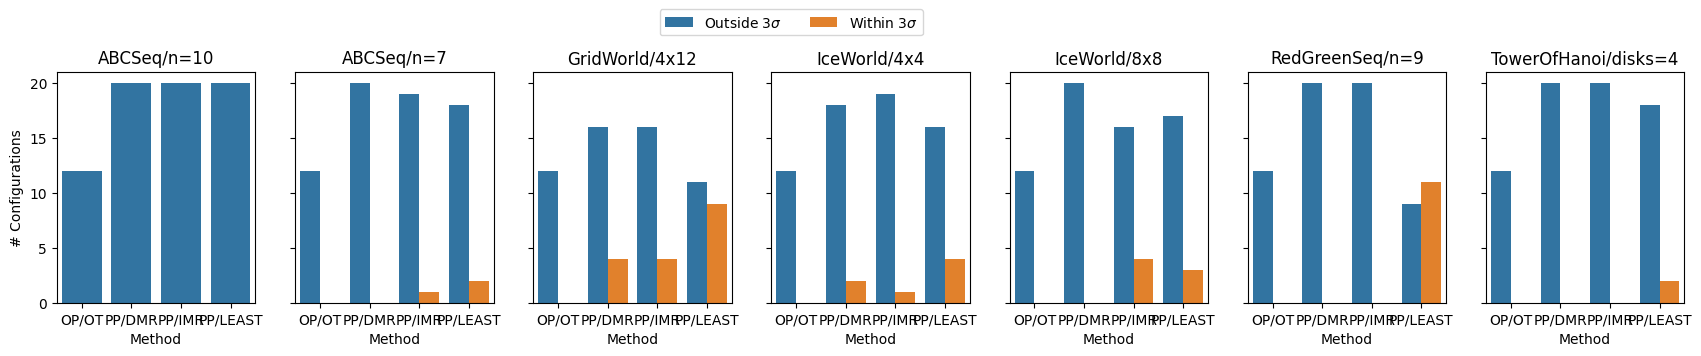

In [29]:
plot_sigma_count(df_within_sigma_count_kmax["one-step"], suffix="one-step")

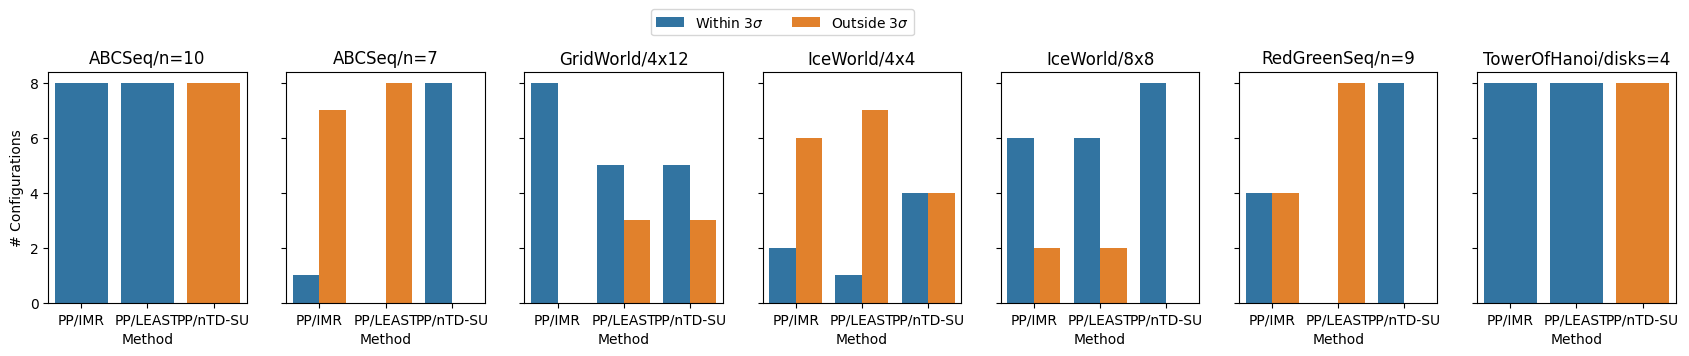

In [30]:
plot_sigma_count(df_within_sigma_count_kmax["n-step"], suffix="n-step")